<a href="https://colab.research.google.com/github/ArjunHaldiya/CaliHousingPrediction/blob/main/CaliHousingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dependencies
The following are the libraries and frameworks required:
1. Numpy
2. Pandas
3. Matplotlib
4. Seaborn
5. Sklearn(datasets)
6. Sklearn(train_test_split)
7. xgboost(XGBRegressor)
8. Sklear(metrics)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Data Preparation
We will fetch the california housing dataset from sklearn.datasets. Then we will prepare the data by creating a python dataframe from the fetched dataset and then we will create a new column prices using the data in target column in the california housing dataset. We will check for the shape, null values present and describe the statistical report of the dataframe.

In [2]:
cali_housing_dataset = sklearn.datasets.fetch_california_housing()

In [3]:
cali_housing_df = pd.DataFrame(cali_housing_dataset.data, columns = cali_housing_dataset.feature_names)

In [4]:
cali_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
cali_housing_df['price'] = cali_housing_dataset.target
cali_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
cali_housing_df.shape

(20640, 9)

In [7]:
cali_housing_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [8]:
cali_housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

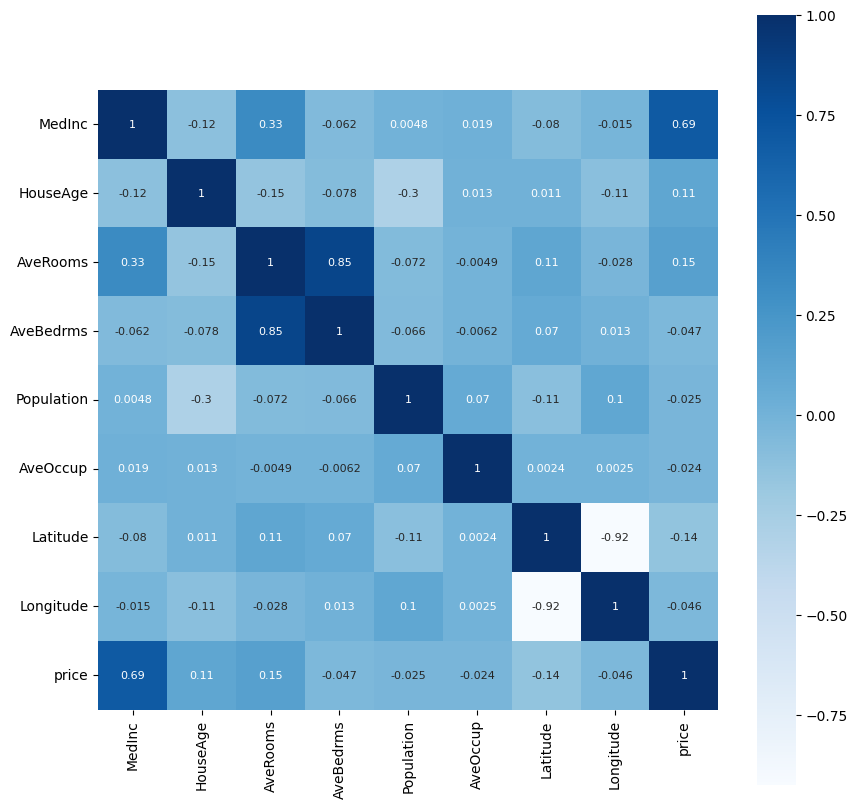

In [10]:
correlation = cali_housing_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, square=True, cbar=True, annot=True, annot_kws={'size':8}, cmap='Blues')

# Preparing Data for Training
After data preparation, we now divide the data and prepare to train it using the XGBRegressor Model:

XGBoost is a powerful approach for building supervised regression models.It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values using metrices like the root mean squared error and the mean abosolute square error.

In order to prpare data for training, we will first split the data into two parts - One would contain the data required to find the price and the other would contain the corresponding price.

Using the train_test_split from sklearn, we will create 4 instances of the two seperated parts i.e X_train, X_test, Y_train, and Y_test, where 80% data would be used to train the model while only 20% is used to test it.

In [16]:
X = cali_housing_df.drop(['price'], axis = 1)
Y = cali_housing_df['price']


In [17]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
Y.head()

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [22]:
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.2, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [24]:
print(Y.shape, Y_train.shape, Y_test.shape)

(20640,) (16512,) (4128,)


#Model Training and Prediction
After spliting the data into triaing and testing sets, now we will train or *fit* the model with the training data and then predict using *X_train*. After predicting we will evaluate the accuracy using two important metrices - **Root mean square error** and **Absolute Mean Error**. We will repeat the prediction and evaluation for the testing set as well. To end we will plot a prediction to actual price scatterplot which would visualize the efficiency of the model.



In [25]:
model = XGBRegressor()

In [26]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [28]:
train_pred = model.predict(X_train)

In [29]:
rms = metrics.r2_score(Y_train, train_pred)
mae = metrics.mean_absolute_error(Y_train, train_pred)

print("Root mean square error: " , rms)
print("Mean absolute error: " , mae)

Root mean square error:  0.943650140819218
Mean absolute error:  0.1933648700612105


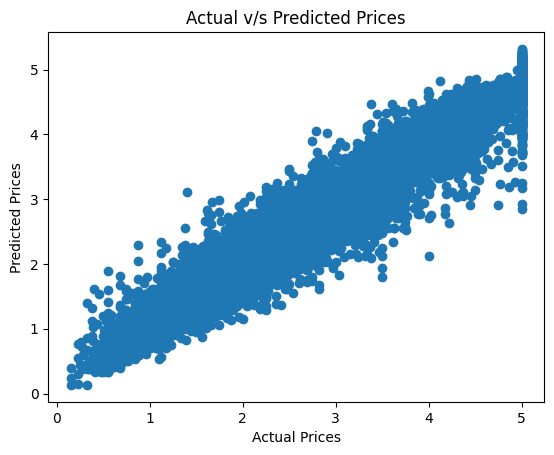

In [31]:
plt.scatter(Y_train, train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual v/s Predicted Prices")
plt.show()

In [33]:
test_pred = model.predict(X_test)

In [34]:
rms = metrics.r2_score(Y_test, test_pred)
mae = metrics.mean_absolute_error(Y_test, test_pred)

print("Root mean square error: " , rms)
print("Mean absolute error: ", mae)

Root mean square error:  0.8338000331788725
Mean absolute error:  0.3108631800268186


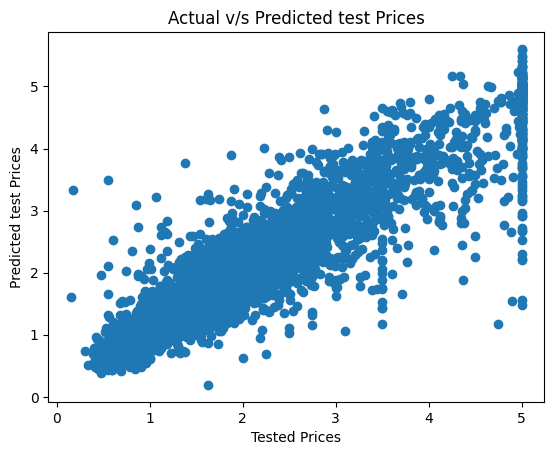

In [35]:
plt.scatter(Y_test, test_pred)
plt.xlabel("Tested Prices")
plt.ylabel("Predicted test Prices")
plt.title("Actual v/s Predicted test Prices")
plt.show()